# 使用样式表和rcParams对Matplotlib进行自定义
本文将介绍自定义Matplotlib的属性和默认样式的技巧。

对Matplotlib进行自定义有下面三种方法：
1. 在运行程序时对rcParams进行设置。
2. 使用样式表。
3. 修改你的matplotlibrc文件。

在运行时修改rcParams的优先级高于样式表，样式表的优先级又高于`matplotlibrc`文件。

## 运行时对rc进行设置
你可以通过在python编译器中修改python脚本或是交互式的代码动态地修改默认的rc（runtime confuguration, 运行时的配置）设置。所有的rc设置都被存储在一个类似于字典的变量`matplotlib.rcParams`中，它是matplotlib包中的全局变量。完整的rcParams中的可配置项详见[matplotlib.rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams)。rcParams能被直接修改，比如下面的例子：

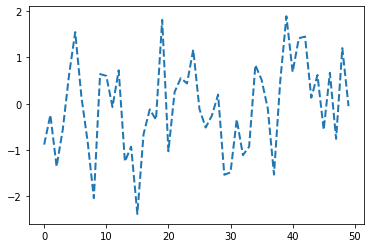

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

mpl.rcParams['lines.linewidth'] = 2 
mpl.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

请注意，如果你要改变绘图的默认颜色，你需要修改axes的*prop_cycle*属性：

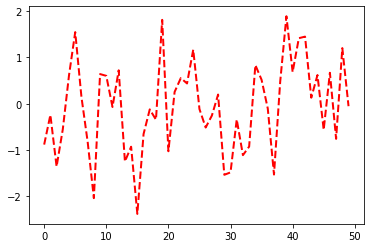

In [3]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.plot(data) # 第一个颜色是红色('r')

Matplotlib还提供了许多方便的函数来帮助我们修改rc设置。`matplotlib.rc`可以一次性使用关键字参数修改一个分组下的多个设置：

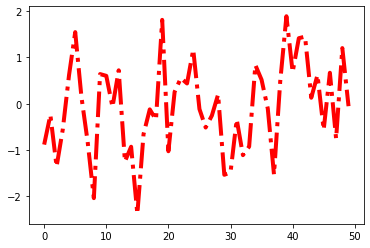

In [4]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

### 临时性的rc设置
使用`matplotlib.rc_context`内容管理器可以对`matplotlib.rcParams`对象进行临时性的修改：

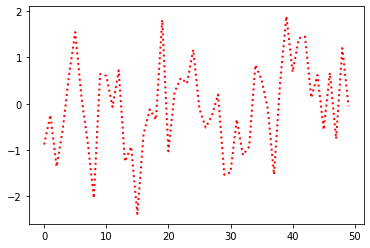

In [5]:
with mpl.rc_context({'lines.linewidth': 2, 'lines.linestyle': ':'}):
    plt.plot(data)

你也可以将`matplotlib.rc_context`用作修饰器来修改一个函数的默认设置：

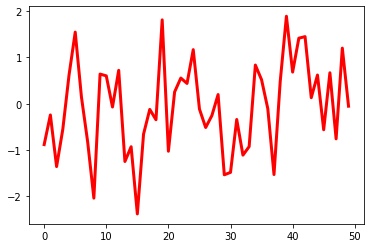

In [6]:
@mpl.rc_context({'lines.linewidth': 3, 'lines.linestyle': '-'})
def plotting_function():
    plt.plot(data)
    
plotting_function()

如果想要恢复标准的Matplotlib默认设置，可以使用`matplolib.rcdefaults`.

In [7]:
mpl.rcdefaults()

在设置rcParams的某些值的时候可能需要验证，详见[matplotlib.rcsetup](https://matplotlib.org/stable/api/rcsetup_api.html#module-matplotlib.rcsetup)。

## 使用样式表
另外一种改变绘图的可视化外观的方法是在样式表中对rcParams进行设置，然后通过`matplotlib.style.use`导入样式表。利用这种方法，你只需要改变导入的样式表类型就可以方便地切换不同的样式。一个样式表看起来和matplotlibrc文件一样，但是在样式表中，你只可以修改那些和绘图的样式相关的rcParams。样式表对其他rcParams（比如后端*backend*）进行的设置会被无视，而`matplotlibrc`文件则可以改变所有的rcParams。这样设计的原因是想让样式表能够在不同的机器上都顺利运行，而不用考虑其他机器上有没有安装一些依赖的包。完整的rcParams中的可配置项详见[matplotlib.rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams)，样式表中会被无视的rcParams详见[matplotlib.style.use](https://matplotlib.org/stable/api/style_api.html#matplotlib.style.use)。

Matplotlib提供了很多[预设好的样式](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)。举例来说，有一种叫`ggplot`的预设样式，它模仿的是R中的ggplot（一个很受欢迎的绘图包）的样式。如果要使用这种样式，你可以添加下面的代码：

In [8]:
plt.style.use('ggplot')

使用下面的代码可以列出所有可用的样式：

In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 定义你自己的样式

你可以创建自定义的样式，并调用`style.use`读取它的路径或者URL，将它用于绘图。举个例子，你可以创建`./images/presentation.mplstyle`文件并向其中写入：

```
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16
```

之后，当你想要将一个适用于论文的绘图变为适用于演讲的样式，你可以用下边的代码：

In [10]:
import matplotlib.pyplot as plt
plt.style.use(r'./images/presentation.mplstyle')

你也可以使用另一种方式，那就是将你的`<样式名>.mplstyle`文件放置在Matplotlib的配置文件夹`(mpl_configdir)/stylelib`下。之后你就可以直接通过调用`style.use(<样式名>)`来使用这个自定义的样式。默认情况下`mpl_configdir`都是`~/.config/matplotlib`，但你也可以通过`matplotlib.get_configdir()`来确认文件夹的位置；如果这个文件夹不存在，你可能需要手动创建一个。你也可以通过修改环境变量`MPLCONFIGDIR`来修改Matplotlib搜索stylelib/文件夹的范围，更多信息见[matplotlib configuration and cache directory locations](https://matplotlib.org/stable/users/faq/troubleshooting_faq.html#locating-matplotlib-config-dir)。

请注意，如果`(mpl_configdir)/stylelib`中的某个自定义样式和Matplotlib的默认样式表有同样的名字，那么它会覆盖默认的样式表的样式。

如果你的`<样式名>.mplstyle`文件已经在正确的`mpl_configdir`文件夹中，那么你就可以通过下面的方式指定样式：

```
import matplotlib.pyplot as plt
plt.style.use(<样式名>)
```

### 组合样式
样式表可以组合起来使用，因此你可以同时使用一个自定义颜色的样式表和另一个将元素大小调整为适合演讲用的样式表。使用他们时只需要将他们组合成一个列表就行：

```
import matplotlib.pyplot as plt
plt.style.use(['dark_background', 'presentation'])
```

请注意，如果两个样式表中的样式有冲突，右边样式表的样式会覆盖左边的。

### 临时样式
如果你只想在某个特定的代码块中使用某种样式，而不想改变全局的样式，style包提供了一个内容管理器(context manager)来让你只对特定范围进行更改。你可以通过类似下面的代码来将你的样式与全局样式隔离开来：

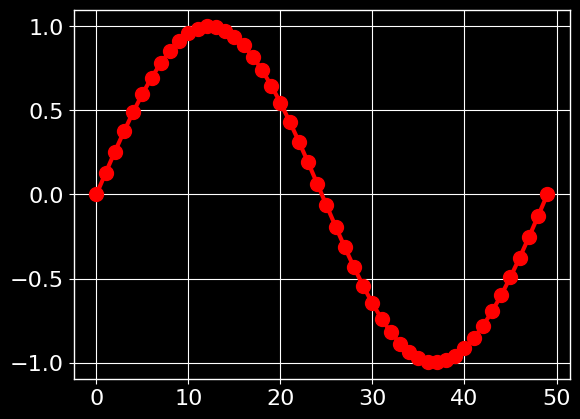

In [11]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

## `matplotlibrc`文件
在Matplotlib中使用`matplotlibrc `配置文件可以自定义所有类型的属性，我们把这些属性称为'rc设置'或'rc参数'。你可以改变Matplotlib中几乎所有的默认属性：图像大小和DPI、线宽、颜色和样式、axes、坐标轴和网格线属性、文本和字体属性……等等。Matplotlib会在启动时就会读取`matplotlibrc`以进行配置，它会按照顺序在下面的位置搜索`matplotlibrc`:
1. 当前工作目录下的`matplotlibrc`。一般是因为你不想把这个`matplotlibrc`应用在其他地方，而只想进行特定图像的自定义时，你才会在当前工作目录下放置这个文件。
2. 如果`\$MATPLOTLIBRC`是一个文件的话，使用它。否则搜索`$MATPLOTLIBRC/matplotlibrc`。
3. 根据你的平台的不同，接下来会搜索用户相关的地址：
   - 在Linux和FreeBSD上，如果你自定义了环境，会在`.config/matplotlib/matplotlibrc`（或`$XDG_CONFIG_HOME/matplotlib/matplotlibrc`）中搜索。
   - 在其他平台上，会搜索` .matplotlib/matplotlibrc.`。
   
   详见[matplotlib configuration and cache directory locations](https://matplotlib.org/stable/users/faq/troubleshooting_faq.html#locating-matplotlib-config-dir)。
4. `INSTALL/matplotlib/mpl-data/matplotlibrc`，其中`INSTALL`在Linux中是类似于`/usr/lib/python3.7/site-packages`的地址，在Windows上是类似于`C:\Python37\Lib\site-packages`的地址。这个位置的`matplotlibrc`在每次安装matplotlib的时候都会重写一遍，所以如果你想养保留你的自定义设置，请将这个文件移动到你的用户相关的matplotlib目录下。

一旦找到了一个`matplotlibrc`文件，就不会继续搜索其他路径。当使用` style.use('<路径>/<样式名>.mplstyle')`激活了样式表时，样式表中相关设置的优先级高于`matplotlibrc`文件。

你可以通过下面的代码显示当前激活的`matplotlibrc`文件的路径：

In [12]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/shelbean/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

下面会展示完整的`matplotlibrc`文件，你还可以通过[matplotlib.rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams)查看所有可配置的rcParams。

### 默认的`matplotlibrc`文件

```
#### MATPLOTLIBRC FORMAT

## NOTE FOR END USERS: DO NOT EDIT THIS FILE!
##
## This is a sample Matplotlib configuration file - you can find a copy
## of it on your system in site-packages/matplotlib/mpl-data/matplotlibrc
## (relative to your Python installation location).
##
## You should find a copy of it on your system at
## site-packages/matplotlib/mpl-data/matplotlibrc (relative to your Python
## installation location).  DO NOT EDIT IT!
##
## If you wish to change your default style, copy this file to one of the
## following locations:
##     Unix/Linux:
##         $HOME/.config/matplotlib/matplotlibrc OR
##         $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
##     Other platforms:
##         $HOME/.matplotlib/matplotlibrc
## and edit that copy.
##
## See https://matplotlib.org/users/customizing.html#the-matplotlibrc-file
## for more details on the paths which are checked for the configuration file.
##
## Blank lines, or lines starting with a comment symbol, are ignored, as are
## trailing comments.  Other lines must have the format:
##     key: val  # optional comment
##
## Formatting: Use PEP8-like style (as enforced in the rest of the codebase).
## All lines start with an additional '#', so that removing all leading '#'s
## yields a valid style file.
##
## Colors: for the color values below, you can either use
##     - a Matplotlib color string, such as r, k, or b
##     - an RGB tuple, such as (1.0, 0.5, 0.0)
##     - a hex string, such as ff00ff
##     - a scalar grayscale intensity such as 0.75
##     - a legal html color name, e.g., red, blue, darkslategray
##
## Matplotlib configuration are currently divided into following parts:
##     - BACKENDS
##     - LINES
##     - PATCHES
##     - HATCHES
##     - BOXPLOT
##     - FONT
##     - TEXT
##     - LaTeX
##     - AXES
##     - DATES
##     - TICKS
##     - GRIDS
##     - LEGEND
##     - FIGURE
##     - IMAGES
##     - CONTOUR PLOTS
##     - ERRORBAR PLOTS
##     - HISTOGRAM PLOTS
##     - SCATTER PLOTS
##     - AGG RENDERING
##     - PATHS
##     - SAVING FIGURES
##     - INTERACTIVE KEYMAPS
##     - ANIMATION

##### CONFIGURATION BEGINS HERE


## ***************************************************************************
## * BACKENDS                                                                *
## ***************************************************************************
## The default backend.  If you omit this parameter, the first working
## backend from the following list is used:
##     MacOSX QtAgg Gtk4Agg Gtk3Agg TkAgg WxAgg Agg
## Other choices include:
##     QtCairo GTK4Cairo GTK3Cairo TkCairo WxCairo Cairo
##     Qt5Agg Qt5Cairo Wx  # deprecated.
##     PS PDF SVG Template
## You can also deploy your own backend outside of Matplotlib by referring to
## the module name (which must be in the PYTHONPATH) as 'module://my_backend'.
##backend: Agg

## The port to use for the web server in the WebAgg backend.
#webagg.port: 8988

## The address on which the WebAgg web server should be reachable
#webagg.address: 127.0.0.1

## If webagg.port is unavailable, a number of other random ports will
## be tried until one that is available is found.
#webagg.port_retries: 50

## When True, open the web browser to the plot that is shown
#webagg.open_in_browser: True

## If you are running pyplot inside a GUI and your backend choice
## conflicts, we will automatically try to find a compatible one for
## you if backend_fallback is True
#backend_fallback: True

#interactive: False
#toolbar:     toolbar2  # {None, toolbar2, toolmanager}
#timezone:    UTC       # a pytz timezone string, e.g., US/Central or Europe/Paris


## ***************************************************************************
## * LINES                                                                   *
## ***************************************************************************
## See https://matplotlib.org/api/artist_api.html#module-matplotlib.lines
## for more information on line properties.
#lines.linewidth: 1.5               # line width in points
#lines.linestyle: -                 # solid line
#lines.color:     C0                # has no affect on plot(); see axes.prop_cycle
#lines.marker:          None        # the default marker
#lines.markerfacecolor: auto        # the default marker face color
#lines.markeredgecolor: auto        # the default marker edge color
#lines.markeredgewidth: 1.0         # the line width around the marker symbol
#lines.markersize:      6           # marker size, in points
#lines.dash_joinstyle:  round       # {miter, round, bevel}
#lines.dash_capstyle:   butt        # {butt, round, projecting}
#lines.solid_joinstyle: round       # {miter, round, bevel}
#lines.solid_capstyle:  projecting  # {butt, round, projecting}
#lines.antialiased: True            # render lines in antialiased (no jaggies)

## The three standard dash patterns.  These are scaled by the linewidth.
#lines.dashed_pattern: 3.7, 1.6
#lines.dashdot_pattern: 6.4, 1.6, 1, 1.6
#lines.dotted_pattern: 1, 1.65
#lines.scale_dashes: True

#markers.fillstyle: full  # {full, left, right, bottom, top, none}

#pcolor.shading: auto
#pcolormesh.snap: True  # Whether to snap the mesh to pixel boundaries. This is
                        # provided solely to allow old test images to remain
                        # unchanged. Set to False to obtain the previous behavior.

## ***************************************************************************
## * PATCHES                                                                 *
## ***************************************************************************
## Patches are graphical objects that fill 2D space, like polygons or circles.
## See https://matplotlib.org/api/artist_api.html#module-matplotlib.patches
## for more information on patch properties.
#patch.linewidth:       1      # edge width in points.
#patch.facecolor:       C0
#patch.edgecolor:       black  # if forced, or patch is not filled
#patch.force_edgecolor: False  # True to always use edgecolor
#patch.antialiased:     True   # render patches in antialiased (no jaggies)


## ***************************************************************************
## * HATCHES                                                                 *
## ***************************************************************************
#hatch.color:     black
#hatch.linewidth: 1.0


## ***************************************************************************
## * BOXPLOT                                                                 *
## ***************************************************************************
#boxplot.notch:       False
#boxplot.vertical:    True
#boxplot.whiskers:    1.5
#boxplot.bootstrap:   None
#boxplot.patchartist: False
#boxplot.showmeans:   False
#boxplot.showcaps:    True
#boxplot.showbox:     True
#boxplot.showfliers:  True
#boxplot.meanline:    False

#boxplot.flierprops.color:           black
#boxplot.flierprops.marker:          o
#boxplot.flierprops.markerfacecolor: none
#boxplot.flierprops.markeredgecolor: black
#boxplot.flierprops.markeredgewidth: 1.0
#boxplot.flierprops.markersize:      6
#boxplot.flierprops.linestyle:       none
#boxplot.flierprops.linewidth:       1.0

#boxplot.boxprops.color:     black
#boxplot.boxprops.linewidth: 1.0
#boxplot.boxprops.linestyle: -

#boxplot.whiskerprops.color:     black
#boxplot.whiskerprops.linewidth: 1.0
#boxplot.whiskerprops.linestyle: -

#boxplot.capprops.color:     black
#boxplot.capprops.linewidth: 1.0
#boxplot.capprops.linestyle: -

#boxplot.medianprops.color:     C1
#boxplot.medianprops.linewidth: 1.0
#boxplot.medianprops.linestyle: -

#boxplot.meanprops.color:           C2
#boxplot.meanprops.marker:          ^
#boxplot.meanprops.markerfacecolor: C2
#boxplot.meanprops.markeredgecolor: C2
#boxplot.meanprops.markersize:       6
#boxplot.meanprops.linestyle:       --
#boxplot.meanprops.linewidth:       1.0


## ***************************************************************************
## * FONT                                                                    *
## ***************************************************************************
## The font properties used by `text.Text`.
## See https://matplotlib.org/api/font_manager_api.html for more information
## on font properties.  The 6 font properties used for font matching are
## given below with their default values.
##
## The font.family property can take either a concrete font name (not supported
## when rendering text with usetex), or one of the following five generic
## values:
##     - 'serif' (e.g., Times),
##     - 'sans-serif' (e.g., Helvetica),
##     - 'cursive' (e.g., Zapf-Chancery),
##     - 'fantasy' (e.g., Western), and
##     - 'monospace' (e.g., Courier).
## Each of these values has a corresponding default list of font names
## (font.serif, etc.); the first available font in the list is used.  Note that
## for font.serif, font.sans-serif, and font.monospace, the first element of
## the list (a DejaVu font) will always be used because DejaVu is shipped with
## Matplotlib and is thus guaranteed to be available; the other entries are
## left as examples of other possible values.
##
## The font.style property has three values: normal (or roman), italic
## or oblique.  The oblique style will be used for italic, if it is not
## present.
##
## The font.variant property has two values: normal or small-caps.  For
## TrueType fonts, which are scalable fonts, small-caps is equivalent
## to using a font size of 'smaller', or about 83%% of the current font
## size.
##
## The font.weight property has effectively 13 values: normal, bold,
## bolder, lighter, 100, 200, 300, ..., 900.  Normal is the same as
## 400, and bold is 700.  bolder and lighter are relative values with
## respect to the current weight.
##
## The font.stretch property has 11 values: ultra-condensed,
## extra-condensed, condensed, semi-condensed, normal, semi-expanded,
## expanded, extra-expanded, ultra-expanded, wider, and narrower.  This
## property is not currently implemented.
##
## The font.size property is the default font size for text, given in points.
## 10 pt is the standard value.
##
## Note that font.size controls default text sizes.  To configure
## special text sizes tick labels, axes, labels, title, etc., see the rc
## settings for axes and ticks.  Special text sizes can be defined
## relative to font.size, using the following values: xx-small, x-small,
## small, medium, large, x-large, xx-large, larger, or smaller

#font.family:  sans-serif
#font.style:   normal
#font.variant: normal
#font.weight:  normal
#font.stretch: normal
#font.size:    10.0

#font.serif:      DejaVu Serif, Bitstream Vera Serif, Computer Modern Roman, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif
#font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
#font.cursive:    Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
#font.fantasy:    Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy
#font.monospace:  DejaVu Sans Mono, Bitstream Vera Sans Mono, Computer Modern Typewriter, Andale Mono, Nimbus Mono L, Courier New, Courier, Fixed, Terminal, monospace


## ***************************************************************************
## * TEXT                                                                    *
## ***************************************************************************
## The text properties used by `text.Text`.
## See https://matplotlib.org/api/artist_api.html#module-matplotlib.text
## for more information on text properties
#text.color: black

## FreeType hinting flag ("foo" corresponds to FT_LOAD_FOO); may be one of the
## following (Proprietary Matplotlib-specific synonyms are given in parentheses,
## but their use is discouraged):
## - default: Use the font's native hinter if possible, else FreeType's auto-hinter.
##            ("either" is a synonym).
## - no_autohint: Use the font's native hinter if possible, else don't hint.
##                ("native" is a synonym.)
## - force_autohint: Use FreeType's auto-hinter.  ("auto" is a synonym.)
## - no_hinting: Disable hinting.  ("none" is a synonym.)
#text.hinting: force_autohint

#text.hinting_factor: 8  # Specifies the amount of softness for hinting in the
                         # horizontal direction.  A value of 1 will hint to full
                         # pixels.  A value of 2 will hint to half pixels etc.
#text.kerning_factor: 0  # Specifies the scaling factor for kerning values.  This
                         # is provided solely to allow old test images to remain
                         # unchanged.  Set to 6 to obtain previous behavior.
                         # Values  other than 0 or 6 have no defined meaning.
#text.antialiased: True  # If True (default), the text will be antialiased.
                         # This only affects raster outputs.


## ***************************************************************************
## * LaTeX                                                                   *
## ***************************************************************************
## For more information on LaTeX properties, see
## https://matplotlib.org/tutorials/text/usetex.html
#text.usetex: False  # use latex for all text handling. The following fonts
                     # are supported through the usual rc parameter settings:
                     # new century schoolbook, bookman, times, palatino,
                     # zapf chancery, charter, serif, sans-serif, helvetica,
                     # avant garde, courier, monospace, computer modern roman,
                     # computer modern sans serif, computer modern typewriter
#text.latex.preamble:   # IMPROPER USE OF THIS FEATURE WILL LEAD TO LATEX FAILURES
                        # AND IS THEREFORE UNSUPPORTED. PLEASE DO NOT ASK FOR HELP
                        # IF THIS FEATURE DOES NOT DO WHAT YOU EXPECT IT TO.
                        # text.latex.preamble is a single line of LaTeX code that
                        # will be passed on to the LaTeX system. It may contain
                        # any code that is valid for the LaTeX "preamble", i.e.
                        # between the "\documentclass" and "\begin{document}"
                        # statements.
                        # Note that it has to be put on a single line, which may
                        # become quite long.
                        # The following packages are always loaded with usetex,
                        # so beware of package collisions:
                        #   geometry, inputenc, type1cm.
                        # PostScript (PSNFSS) font packages may also be
                        # loaded, depending on your font settings.

## The following settings allow you to select the fonts in math mode.
#mathtext.fontset: dejavusans  # Should be 'dejavusans' (default),
                               # 'dejavuserif', 'cm' (Computer Modern), 'stix',
                               # 'stixsans' or 'custom' (unsupported, may go
                               # away in the future)
## "mathtext.fontset: custom" is defined by the mathtext.bf, .cal, .it, ...
## settings which map a TeX font name to a fontconfig font pattern.  (These
## settings are not used for other font sets.)
#mathtext.bf:  sans:bold
#mathtext.cal: cursive
#mathtext.it:  sans:italic
#mathtext.rm:  sans
#mathtext.sf:  sans
#mathtext.tt:  monospace
#mathtext.fallback: cm  # Select fallback font from ['cm' (Computer Modern), 'stix'
                        # 'stixsans'] when a symbol can not be found in one of the
                        # custom math fonts. Select 'None' to not perform fallback
                        # and replace the missing character by a dummy symbol.
#mathtext.default: it  # The default font to use for math.
                       # Can be any of the LaTeX font names, including
                       # the special name "regular" for the same font
                       # used in regular text.


## ***************************************************************************
## * AXES                                                                    *
## ***************************************************************************
## Following are default face and edge colors, default tick sizes,
## default font sizes for tick labels, and so on.  See
## https://matplotlib.org/api/axes_api.html#module-matplotlib.axes
#axes.facecolor:     white   # axes background color
#axes.edgecolor:     black   # axes edge color
#axes.linewidth:     0.8     # edge line width
#axes.grid:          False   # display grid or not
#axes.grid.axis:     both    # which axis the grid should apply to
#axes.grid.which:    major   # grid lines at {major, minor, both} ticks
#axes.titlelocation: center  # alignment of the title: {left, right, center}
#axes.titlesize:     large   # font size of the axes title
#axes.titleweight:   normal  # font weight of title
#axes.titlecolor:    auto    # color of the axes title, auto falls back to
                             # text.color as default value
#axes.titley:        None    # position title (axes relative units).  None implies auto
#axes.titlepad:      6.0     # pad between axes and title in points
#axes.labelsize:     medium  # font size of the x and y labels
#axes.labelpad:      4.0     # space between label and axis
#axes.labelweight:   normal  # weight of the x and y labels
#axes.labelcolor:    black
#axes.axisbelow:     line    # draw axis gridlines and ticks:
                             #     - below patches (True)
                             #     - above patches but below lines ('line')
                             #     - above all (False)

#axes.formatter.limits: -5, 6  # use scientific notation if log10
                               # of the axis range is smaller than the
                               # first or larger than the second
#axes.formatter.use_locale: False  # When True, format tick labels
                                   # according to the user's locale.
                                   # For example, use ',' as a decimal
                                   # separator in the fr_FR locale.
#axes.formatter.use_mathtext: False  # When True, use mathtext for scientific
                                     # notation.
#axes.formatter.min_exponent: 0  # minimum exponent to format in scientific notation
#axes.formatter.useoffset: True  # If True, the tick label formatter
                                 # will default to labeling ticks relative
                                 # to an offset when the data range is
                                 # small compared to the minimum absolute
                                 # value of the data.
#axes.formatter.offset_threshold: 4  # When useoffset is True, the offset
                                     # will be used when it can remove
                                     # at least this number of significant
                                     # digits from tick labels.

#axes.spines.left:   True  # display axis spines
#axes.spines.bottom: True
#axes.spines.top:    True
#axes.spines.right:  True

#axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See
                           # https://en.wikipedia.org/wiki/Plus_and_minus_signs#Character_codes
#axes.prop_cycle: cycler('color', ['1f77b4', 'ff7f0e', '2ca02c', 'd62728', '9467bd', '8c564b', 'e377c2', '7f7f7f', 'bcbd22', '17becf'])
                  # color cycle for plot lines as list of string color specs:
                  # single letter, long name, or web-style hex
                  # As opposed to all other parameters in this file, the color
                  # values must be enclosed in quotes for this parameter,
                  # e.g. '1f77b4', instead of 1f77b4.
                  # See also https://matplotlib.org/tutorials/intermediate/color_cycle.html
                  # for more details on prop_cycle usage.
#axes.xmargin:   .05  # x margin.  See `axes.Axes.margins`
#axes.ymargin:   .05  # y margin.  See `axes.Axes.margins`
#axes.zmargin:   .05  # z margin.  See `axes.Axes.margins`
#axes.autolimit_mode: data  # If "data", use axes.xmargin and axes.ymargin as is.
                            # If "round_numbers", after application of margins, axis
                            # limits are further expanded to the nearest "round" number.
#polaraxes.grid: True  # display grid on polar axes
#axes3d.grid:    True  # display grid on 3D axes


## ***************************************************************************
## * AXIS                                                                    *
## ***************************************************************************
#xaxis.labellocation: center  # alignment of the xaxis label: {left, right, center}
#yaxis.labellocation: center  # alignment of the yaxis label: {bottom, top, center}


## ***************************************************************************
## * DATES                                                                   *
## ***************************************************************************
## These control the default format strings used in AutoDateFormatter.
## Any valid format datetime format string can be used (see the python
## `datetime` for details).  For example, by using:
##     - '%%x' will use the locale date representation
##     - '%%X' will use the locale time representation
##     - '%%c' will use the full locale datetime representation
## These values map to the scales:
##     {'year': 365, 'month': 30, 'day': 1, 'hour': 1/24, 'minute': 1 / (24 * 60)}

#date.autoformatter.year:        %Y
#date.autoformatter.month:       %Y-%m
#date.autoformatter.day:         %Y-%m-%d
#date.autoformatter.hour:        %m-%d %H
#date.autoformatter.minute:      %d %H:%M
#date.autoformatter.second:      %H:%M:%S
#date.autoformatter.microsecond: %M:%S.%f
## The reference date for Matplotlib's internal date representation
## See https://matplotlib.org/examples/ticks_and_spines/date_precision_and_epochs.py
#date.epoch: 1970-01-01T00:00:00
## 'auto', 'concise':
#date.converter:                  auto
## For auto converter whether to use interval_multiples:
#date.interval_multiples:         True

## ***************************************************************************
## * TICKS                                                                   *
## ***************************************************************************
## See https://matplotlib.org/api/axis_api.html#matplotlib.axis.Tick
#xtick.top:           False   # draw ticks on the top side
#xtick.bottom:        True    # draw ticks on the bottom side
#xtick.labeltop:      False   # draw label on the top
#xtick.labelbottom:   True    # draw label on the bottom
#xtick.major.size:    3.5     # major tick size in points
#xtick.minor.size:    2       # minor tick size in points
#xtick.major.width:   0.8     # major tick width in points
#xtick.minor.width:   0.6     # minor tick width in points
#xtick.major.pad:     3.5     # distance to major tick label in points
#xtick.minor.pad:     3.4     # distance to the minor tick label in points
#xtick.color:         black   # color of the ticks
#xtick.labelcolor:    inherit # color of the tick labels or inherit from xtick.color
#xtick.labelsize:     medium  # font size of the tick labels
#xtick.direction:     out     # direction: {in, out, inout}
#xtick.minor.visible: False   # visibility of minor ticks on x-axis
#xtick.major.top:     True    # draw x axis top major ticks
#xtick.major.bottom:  True    # draw x axis bottom major ticks
#xtick.minor.top:     True    # draw x axis top minor ticks
#xtick.minor.bottom:  True    # draw x axis bottom minor ticks
#xtick.alignment:     center  # alignment of xticks

#ytick.left:          True    # draw ticks on the left side
#ytick.right:         False   # draw ticks on the right side
#ytick.labelleft:     True    # draw tick labels on the left side
#ytick.labelright:    False   # draw tick labels on the right side
#ytick.major.size:    3.5     # major tick size in points
#ytick.minor.size:    2       # minor tick size in points
#ytick.major.width:   0.8     # major tick width in points
#ytick.minor.width:   0.6     # minor tick width in points
#ytick.major.pad:     3.5     # distance to major tick label in points
#ytick.minor.pad:     3.4     # distance to the minor tick label in points
#ytick.color:         black   # color of the ticks
#ytick.labelcolor:    inherit # color of the tick labels or inherit from ytick.color
#ytick.labelsize:     medium  # font size of the tick labels
#ytick.direction:     out     # direction: {in, out, inout}
#ytick.minor.visible: False   # visibility of minor ticks on y-axis
#ytick.major.left:    True    # draw y axis left major ticks
#ytick.major.right:   True    # draw y axis right major ticks
#ytick.minor.left:    True    # draw y axis left minor ticks
#ytick.minor.right:   True    # draw y axis right minor ticks
#ytick.alignment:     center_baseline  # alignment of yticks


## ***************************************************************************
## * GRIDS                                                                   *
## ***************************************************************************
#grid.color:     b0b0b0  # grid color
#grid.linestyle: -       # solid
#grid.linewidth: 0.8     # in points
#grid.alpha:     1.0     # transparency, between 0.0 and 1.0


## ***************************************************************************
## * LEGEND                                                                  *
## ***************************************************************************
#legend.loc:           best
#legend.frameon:       True     # if True, draw the legend on a background patch
#legend.framealpha:    0.8      # legend patch transparency
#legend.facecolor:     inherit  # inherit from axes.facecolor; or color spec
#legend.edgecolor:     0.8      # background patch boundary color
#legend.fancybox:      True     # if True, use a rounded box for the
                                # legend background, else a rectangle
#legend.shadow:        False    # if True, give background a shadow effect
#legend.numpoints:     1        # the number of marker points in the legend line
#legend.scatterpoints: 1        # number of scatter points
#legend.markerscale:   1.0      # the relative size of legend markers vs. original
#legend.fontsize:      medium
#legend.labelcolor:    None
#legend.title_fontsize: None    # None sets to the same as the default axes.

## Dimensions as fraction of font size:
#legend.borderpad:     0.4  # border whitespace
#legend.labelspacing:  0.5  # the vertical space between the legend entries
#legend.handlelength:  2.0  # the length of the legend lines
#legend.handleheight:  0.7  # the height of the legend handle
#legend.handletextpad: 0.8  # the space between the legend line and legend text
#legend.borderaxespad: 0.5  # the border between the axes and legend edge
#legend.columnspacing: 2.0  # column separation


## ***************************************************************************
## * FIGURE                                                                  *
## ***************************************************************************
## See https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure
#figure.titlesize:   large     # size of the figure title (``Figure.suptitle()``)
#figure.titleweight: normal    # weight of the figure title
#figure.figsize:     6.4, 4.8  # figure size in inches
#figure.dpi:         100       # figure dots per inch
#figure.facecolor:   white     # figure face color
#figure.edgecolor:   white     # figure edge color
#figure.frameon:     True      # enable figure frame
#figure.max_open_warning: 20   # The maximum number of figures to open through
                               # the pyplot interface before emitting a warning.
                               # If less than one this feature is disabled.
#figure.raise_window : True    # Raise the GUI window to front when show() is called.

## The figure subplot parameters.  All dimensions are a fraction of the figure width and height.
#figure.subplot.left:   0.125  # the left side of the subplots of the figure
#figure.subplot.right:  0.9    # the right side of the subplots of the figure
#figure.subplot.bottom: 0.11   # the bottom of the subplots of the figure
#figure.subplot.top:    0.88   # the top of the subplots of the figure
#figure.subplot.wspace: 0.2    # the amount of width reserved for space between subplots,
                               # expressed as a fraction of the average axis width
#figure.subplot.hspace: 0.2    # the amount of height reserved for space between subplots,
                               # expressed as a fraction of the average axis height

## Figure layout
#figure.autolayout: False  # When True, automatically adjust subplot
                           # parameters to make the plot fit the figure
                           # using `tight_layout`
#figure.constrained_layout.use: False  # When True, automatically make plot
                                       # elements fit on the figure. (Not
                                       # compatible with `autolayout`, above).
#figure.constrained_layout.h_pad:  0.04167  # Padding around axes objects. Float representing
#figure.constrained_layout.w_pad:  0.04167  # inches. Default is 3/72 inches (3 points)
#figure.constrained_layout.hspace: 0.02     # Space between subplot groups. Float representing
#figure.constrained_layout.wspace: 0.02     # a fraction of the subplot widths being separated.


## ***************************************************************************
## * IMAGES                                                                  *
## ***************************************************************************
#image.aspect:          equal        # {equal, auto} or a number
#image.interpolation:   antialiased  # see help(imshow) for options
#image.cmap:            viridis      # A colormap name, gray etc...
#image.lut:             256          # the size of the colormap lookup table
#image.origin:          upper        # {lower, upper}
#image.resample:        True
#image.composite_image: True  # When True, all the images on a set of axes are
                              # combined into a single composite image before
                              # saving a figure as a vector graphics file,
                              # such as a PDF.


## ***************************************************************************
## * CONTOUR PLOTS                                                           *
## ***************************************************************************
#contour.negative_linestyle: dashed  # string or on-off ink sequence
#contour.corner_mask:        True    # {True, False, legacy}
#contour.linewidth:          None    # {float, None} Size of the contour line
                                     # widths. If set to None, it falls back to
                                     # `line.linewidth`.


## ***************************************************************************
## * ERRORBAR PLOTS                                                          *
## ***************************************************************************
#errorbar.capsize: 0  # length of end cap on error bars in pixels


## ***************************************************************************
## * HISTOGRAM PLOTS                                                         *
## ***************************************************************************
#hist.bins: 10  # The default number of histogram bins or 'auto'.


## ***************************************************************************
## * SCATTER PLOTS                                                           *
## ***************************************************************************
#scatter.marker: o         # The default marker type for scatter plots.
#scatter.edgecolors: face  # The default edge colors for scatter plots.


## ***************************************************************************
## * AGG RENDERING                                                           *
## ***************************************************************************
## Warning: experimental, 2008/10/10
#agg.path.chunksize: 0  # 0 to disable; values in the range
                        # 10000 to 100000 can improve speed slightly
                        # and prevent an Agg rendering failure
                        # when plotting very large data sets,
                        # especially if they are very gappy.
                        # It may cause minor artifacts, though.
                        # A value of 20000 is probably a good
                        # starting point.


## ***************************************************************************
## * PATHS                                                                   *
## ***************************************************************************
#path.simplify: True  # When True, simplify paths by removing "invisible"
                      # points to reduce file size and increase rendering
                      # speed
#path.simplify_threshold: 0.111111111111  # The threshold of similarity below
                                          # which vertices will be removed in
                                          # the simplification process.
#path.snap: True  # When True, rectilinear axis-aligned paths will be snapped
                  # to the nearest pixel when certain criteria are met.
                  # When False, paths will never be snapped.
#path.sketch: None  # May be None, or a 3-tuple of the form:
                    # (scale, length, randomness).
                    #     - *scale* is the amplitude of the wiggle
                    #         perpendicular to the line (in pixels).
                    #     - *length* is the length of the wiggle along the
                    #         line (in pixels).
                    #     - *randomness* is the factor by which the length is
                    #         randomly scaled.
#path.effects:


## ***************************************************************************
## * SAVING FIGURES                                                          *
## ***************************************************************************
## The default savefig parameters can be different from the display parameters
## e.g., you may want a higher resolution, or to make the figure
## background white
#savefig.dpi:       figure      # figure dots per inch or 'figure'
#savefig.facecolor: auto        # figure face color when saving
#savefig.edgecolor: auto        # figure edge color when saving
#savefig.format:    png         # {png, ps, pdf, svg}
#savefig.bbox:      standard    # {tight, standard}
                                # 'tight' is incompatible with pipe-based animation
                                # backends (e.g. 'ffmpeg') but will work with those
                                # based on temporary files (e.g. 'ffmpeg_file')
#savefig.pad_inches:   0.1      # Padding to be used when bbox is set to 'tight'
#savefig.directory:    ~        # default directory in savefig dialog box,
                                # leave empty to always use current working directory
#savefig.transparent: False     # setting that controls whether figures are saved with a
                                # transparent background by default
#savefig.orientation: portrait  # Orientation of saved figure

### tk backend params
#tk.window_focus:   False  # Maintain shell focus for TkAgg

### ps backend params
#ps.papersize:      letter  # {auto, letter, legal, ledger, A0-A10, B0-B10}
#ps.useafm:         False   # use of AFM fonts, results in small files
#ps.usedistiller:   False   # {ghostscript, xpdf, None}
                            # Experimental: may produce smaller files.
                            # xpdf intended for production of publication quality files,
                            # but requires ghostscript, xpdf and ps2eps
#ps.distiller.res:  6000    # dpi
#ps.fonttype:       3       # Output Type 3 (Type3) or Type 42 (TrueType)

### PDF backend params
#pdf.compression:    6  # integer from 0 to 9
                        # 0 disables compression (good for debugging)
#pdf.fonttype:       3  # Output Type 3 (Type3) or Type 42 (TrueType)
#pdf.use14corefonts: False
#pdf.inheritcolor:   False

### SVG backend params
#svg.image_inline: True  # Write raster image data directly into the SVG file
#svg.fonttype: path      # How to handle SVG fonts:
                         #     path: Embed characters as paths -- supported
                         #           by most SVG renderers
                         #     None: Assume fonts are installed on the
                         #           machine where the SVG will be viewed.
#svg.hashsalt: None      # If not None, use this string as hash salt instead of uuid4

### pgf parameter
## See https://matplotlib.org/tutorials/text/pgf.html for more information.
#pgf.rcfonts: True
#pgf.preamble:  # See text.latex.preamble for documentation
#pgf.texsystem: xelatex

### docstring params
#docstring.hardcopy: False  # set this when you want to generate hardcopy docstring


## ***************************************************************************
## * INTERACTIVE KEYMAPS                                                     *
## ***************************************************************************
## Event keys to interact with figures/plots via keyboard.
## See https://matplotlib.org/users/navigation_toolbar.html for more details on
## interactive navigation.  Customize these settings according to your needs.
## Leave the field(s) empty if you don't need a key-map. (i.e., fullscreen : '')
#keymap.fullscreen: f, ctrl+f   # toggling
#keymap.home: h, r, home        # home or reset mnemonic
#keymap.back: left, c, backspace, MouseButton.BACK  # forward / backward keys
#keymap.forward: right, v, MouseButton.FORWARD      # for quick navigation
#keymap.pan: p                  # pan mnemonic
#keymap.zoom: o                 # zoom mnemonic
#keymap.save: s, ctrl+s         # saving current figure
#keymap.help: f1                # display help about active tools
#keymap.quit: ctrl+w, cmd+w, q  # close the current figure
#keymap.quit_all:               # close all figures
#keymap.grid: g                 # switching on/off major grids in current axes
#keymap.grid_minor: G           # switching on/off minor grids in current axes
#keymap.yscale: l               # toggle scaling of y-axes ('log'/'linear')
#keymap.xscale: k, L            # toggle scaling of x-axes ('log'/'linear')
#keymap.copy: ctrl+c, cmd+c     # copy figure to clipboard


## ***************************************************************************
## * ANIMATION                                                               *
## ***************************************************************************
#animation.html: none  # How to display the animation as HTML in
                       # the IPython notebook:
                       #     - 'html5' uses HTML5 video tag
                       #     - 'jshtml' creates a JavaScript animation
#animation.writer:  ffmpeg        # MovieWriter 'backend' to use
#animation.codec:   h264          # Codec to use for writing movie
#animation.bitrate: -1            # Controls size/quality trade-off for movie.
                                  # -1 implies let utility auto-determine
#animation.frame_format: png      # Controls frame format used by temp files
#animation.ffmpeg_path:  ffmpeg   # Path to ffmpeg binary. Without full path
                                  # $PATH is searched
#animation.ffmpeg_args:           # Additional arguments to pass to ffmpeg
#animation.convert_path: convert  # Path to ImageMagick's convert binary.
                                  # On Windows use the full path since convert
                                  # is also the name of a system tool.
#animation.convert_args:          # Additional arguments to pass to convert
#animation.embed_limit:  20.0     # Limit, in MB, of size of base64 encoded
                                  # animation in HTML (i.e. IPython notebook)

```